In [42]:
import keras
import tensorflow as tf
import numpy as np

from preprocessing import *

#preprocessing 
X_train, y_train = load_data('archive/dataset2-master/dataset2-master/images/TRAIN/')
X_test, y_test = load_data('archive/dataset2-master/dataset2-master/images/TEST/')

In [46]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D 
from tensorflow.keras import layers
from tensorflow.keras import optimizers

def conv_net(X_train,y_train,X_test,y_test):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(60, 80, 3)))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(Dense(128))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train,
         epochs = 100,
         batch_size = 256,
         validation_data = (X_test,y_test))
    return model, history

In [47]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

model, history = conv_net(X_train,y_train,X_test,y_test)

model.summary()
plot_model(model, to_file='structure.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(13,18))

Epoch 1/100
39/39 [==============================] - 67s 2s/step - loss: 1.6755 - accuracy: 0.3969 - val_loss: 2.2871 - val_accuracy: 0.2493
Epoch 2/100
39/39 [==============================] - 66s 2s/step - loss: 1.0267 - accuracy: 0.5649 - val_loss: 2.2660 - val_accuracy: 0.2497
Epoch 3/100
39/39 [==============================] - 66s 2s/step - loss: 0.8050 - accuracy: 0.6602 - val_loss: 4.0710 - val_accuracy: 0.2493
Epoch 4/100
39/39 [==============================] - 66s 2s/step - loss: 0.6395 - accuracy: 0.7418 - val_loss: 8.6063 - val_accuracy: 0.2493
Epoch 5/100
39/39 [==============================] - 67s 2s/step - loss: 0.4780 - accuracy: 0.8077 - val_loss: 6.5959 - val_accuracy: 0.2493
Epoch 6/100
39/39 [==============================] - 68s 2s/step - loss: 0.3301 - accuracy: 0.8711 - val_loss: 7.0405 - val_accuracy: 0.2493
Epoch 7/100
39/39 [==============================] - 68s 2s/step - loss: 0.2419 - accuracy: 0.9055 - val_loss: 8.1821 - val_accuracy: 0.2493
Epoch 8/100
3

39/39 [==============================] - 159s 4s/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 35.3947 - val_accuracy: 0.2505
Epoch 59/100
39/39 [==============================] - 164s 4s/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 53.9217 - val_accuracy: 0.2493
Epoch 60/100
39/39 [==============================] - 150s 4s/step - loss: 0.0183 - accuracy: 0.9949 - val_loss: 22.3458 - val_accuracy: 0.2855
Epoch 61/100
39/39 [==============================] - 66s 2s/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 8.6712 - val_accuracy: 0.4310
Epoch 62/100
39/39 [==============================] - 66s 2s/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 52.9284 - val_accuracy: 0.2505
Epoch 63/100
39/39 [==============================] - 65s 2s/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 30.3856 - val_accuracy: 0.3961
Epoch 64/100
39/39 [==============================] - 66s 2s/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 7.9184 - val_accuracy: 0.3932
Epoch 65/10

<Figure size 936x1296 with 0 Axes>

<Figure size 936x1296 with 0 Axes>

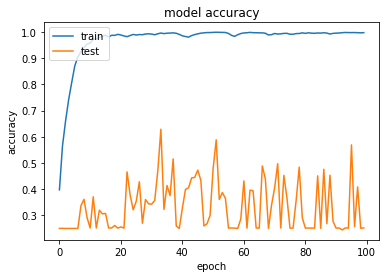

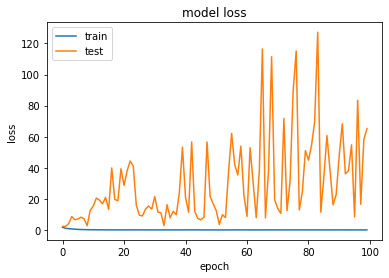

In [48]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
model.save('100epochs')

2021-12-03 16:15:40.186010: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: 100epochs/assets


In [ ]:
def conv_net_no_reg(X_train,y_train,X_test,y_test):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), input_shape=(60, 80, 3)))
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3)))
    model.add(layers.LeakyReLU())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(layers.LeakyReLU())
    model.add(Dense(128))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.Adam(learning_rate=1e-3),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train,
         epochs = 100,
         batch_size = 256,
         validation_data = (X_test,y_test))
    return model, history


model2, history2 = conv_net_no_reg(X_train,y_train,X_test,y_test)

model2.summary()
plot_model(model2, to_file='structure2.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(13,18))


#accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [60]:
model2.save('no reg 100 epochs')

INFO:tensorflow:Assets written to: no reg 100 epochs/assets
